# STQD6014 Project 2

## 1.0 Introduction

San Francisco International Airport (IATA: SFO, ICAO: KSFO), commonly known as San Francisco Airport, is a major gateway for both passenger and cargo traffic in the United States. In 2024, SFO ranked 13th among the busiest U.S. airports by enplanements and 27th in terms of cargo weight landed, recording a 1.96% increase from 2023 (source:https://www.faa.gov/airports/planning_capacity/passenger_allcargo_stats/passenger). Classified as a Large Hub Airport, SFO handles 1% or more of annual U.S. commercial enplanements, indicating its importance in national and international aviation networks.

This study focuses on analyzing cargo traffic volumes at SFO, which is transported via commercial aircraft as well as dedicated freighters. By examining cargo traffic patterns, stakeholders can uncover seasonal fluctuations, identify operational inefficiencies, and anticipate external shocks such as economic downturns or pandemics. These insights support strategic resource allocation, enabling airport authorities, airlines, and logistics partners to strengthen forecasting accuracy, optimize cargo handling capacity, and enhance supply chain resilience.

A deeper understanding of SFO's cargo operations reinforces its role as critical hub in global trade. It ensures that the airport continues to connect business, markets and supply chains across the world.

References


*   https://www.faa.gov/airports/planning_capacity/passenger_allcargo_stats/passenger
*   https://www.faa.gov/airports/planning_capacity/categories



## 2.0 Problem Statement

Air cargo operations at San Francisco International Airport (SFO) are a vital driver of global trade and supply chain resilience, and analyzing this dataset empowers stakeholders to optimize resources, strengthen logistics strategies, and capture growth opportunities.

The objective is to analyze air traffic cargo statistics at SFO in order to:



*   Identify seasonal trends and anomalies in cargo movement.
*   Compare cargo volumes across airlines, regions, and aircraft types to uncover operational inefficiencies or competitive advantages.



*   Develop predictive models for future cargo demand, accounting for seasonality and external shocks (e.g., economic downturns, pandemics).
*   Provide data-driven recommendations for airport authorities, airlines, and logistics stakeholders to optimize cargo handling capacity and improve forecasting accuracy.


Accurate forecasting and comparative analysis of cargo flows can enhance airport resource allocation, airline scheduling, and supply chain resilience, ultimately supporting more efficient global trade through SFO.



## 3.0 Data Pre-processing

# Source:

1.  Air Traffic Cargo
    https://catalog.data.gov/dataset/air-traffic-cargo-statistics/resource/125ff040-5627-4a43-b629-4d13bd357758

2.  IATA Airline Code
    https://en.wikipedia.org/wiki/List_of_airline_codes



In [2]:
# ============================
# Import Libraries
# ============================
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ============================
# 1. Load Cargo Dataset
# ============================
url_cargo = "https://data.sfgov.org/api/views/u397-j8nr/rows.csv?accessType=DOWNLOAD"
df_cargo = pd.read_csv(url_cargo)

print("\nFirst 5 rows of df_cargo (Structure and Sample Data):")
display(df_cargo.head())
print("df_cargo Info (Data Types and Non-Null Counts) before cleaning:")
df_cargo.info()
print("df_cargo missing values before cleaning:")
df_cargo.isnull().sum()
df_cargo['Cargo Metric TONS'].sum()


First 5 rows of df_cargo (Structure and Sample Data):


,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS,data_as_of,data_loaded_at
0,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,349048,158.328173,2025/12/20 02:00:06 PM,2025/12/22 03:03:31 PM
1,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,122003,55.340561,2025/12/20 02:00:06 PM,2025/12/22 03:03:31 PM
2,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,514450,233.354520,2025/12/20 02:00:06 PM,2025/12/22 03:03:31 PM
3,199907,1999/07/01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Mail,Passenger,89776,40.722394,2025/12/20 02:00:06 PM,2025/12/22 03:03:31 PM
4,199907,1999/07/01,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Cargo,Passenger,13086,5.935810,2025/12/20 02:00:06 PM,2025/12/22 03:03:31 PM


df_cargo Info (Data Types and Non-Null Counts) before cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58016 entries, 0 to 58015
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              58016 non-null  int64  
 1   Activity Period Start Date   58016 non-null  object 
 2   Operating Airline            58016 non-null  object 
 3   Operating Airline IATA Code  57437 non-null  object 
 4   Published Airline            58016 non-null  object 
 5   Published Airline IATA Code  57437 non-null  object 
 6   GEO Summary                  58016 non-null  object 
 7   GEO Region                   58016 non-null  object 
 8   Activity Type Code           58016 non-null  object 
 9   Cargo Type Code              58016 non-null  object 
 10  Cargo Aircraft Type          58016 non-null  object 
 11  Cargo Weight LBS             58016 non-null  int64  
 12  Cargo Metr

np.float64(13835994.4748592)

In [4]:
# Data Cleaning
# Drop specified columns
columns_to_drop = ["Activity Period","Cargo Weight LBS", "data_as_of", "data_loaded_at", "Published Airline", "Published Airline IATA Code"]
df_cargo = df_cargo.drop(columns=columns_to_drop, errors='ignore')
print(f"\nDropped columns: {columns_to_drop}")

# Convert 'Activity Period Start Date' --> datetime --> date-only
df_cargo["Activity Period Start Date"] = pd.to_datetime(df_cargo["Activity Period Start Date"])

# Check min and max of 'Activity Period Start Date' after filtering
min_date = df_cargo["Activity Period Start Date"].min()
max_date = df_cargo["Activity Period Start Date"].max()
print(f"\nMinimum 'Activity Period Start Date': {min_date}")
print(f"Maximum 'Activity Period Start Date': {max_date}")

# Filter data from Year 2015 onwards
start_date_2015 = pd.to_datetime('2015-01-01')
df_cargo = df_cargo[df_cargo["Activity Period Start Date"] >= start_date_2015].copy()
print("\nFiltered df_cargo to include data from Year 2015 onwards. Data before Year 2015 are removed")

# Optional: Display updated info after dropping columns and converting date type
#print("\ndf_cargo Info (Data Types and Non-Null Counts) after cleaning and filtering:")
df_cargo.info()

# Check for missing values in 'Cargo'
print("\nMissing values in 'Cargo':")
print(df_cargo.isnull().sum())

# Check which Airline has missing IATA code
# IATA code is essential for Aviation stakeholders
airlines_with_missing_iata = df_cargo[df_cargo['Operating Airline IATA Code'].isnull()]['Operating Airline'].unique()
print("\nAirlines with missing IATA Codes:")
for airline in airlines_with_missing_iata:
    print(f"- {airline}")



Dropped columns: ['Activity Period', 'Cargo Weight LBS', 'data_as_of', 'data_loaded_at', 'Published Airline', 'Published Airline IATA Code']

Minimum 'Activity Period Start Date': 1999-07-01 00:00:00
Maximum 'Activity Period Start Date': 2025-10-01 00:00:00

Filtered df_cargo to include data from Year 2015 onwards. Data before Year 2015 are removed
<class 'pandas.core.frame.DataFrame'>
Index: 22983 entries, 35033 to 58015
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Activity Period Start Date   22983 non-null  datetime64[ns]
 1   Operating Airline            22983 non-null  object        
 2   Operating Airline IATA Code  22924 non-null  object        
 3   GEO Summary                  22983 non-null  object        
 4   GEO Region                   22983 non-null  object        
 5   Activity Type Code           22983 non-null  object        
 6   Cargo Type Code 

In [5]:
# ============================
# 2. Load IATA Airline Codes from Wikipedia
# ============================
import io
url_codes = "https://en.wikipedia.org/wiki/List_of_airline_codes"
headers = {"User-Agent": "Mozilla/5.0"}  # mimic browser
response = requests.get(url_codes, headers=headers)
response.raise_for_status()

# Extract tables
tables = pd.read_html(io.StringIO(response.text))   # Wrap response.text in io.StringIO
airline_codes = tables[0]   # main airline codes table

# Show IATA and Airline column only
iata_codes = airline_codes[['IATA', 'Airline']].copy()
print("New DataFrame 'iata_codes' created with 'IATA' and 'Airline' columns.")
print(iata_codes.head())

# Clean airline names for merging
iata_codes["Airline"] = iata_codes["Airline"].str.strip().str.lower()
print(iata_codes.head())

New DataFrame 'iata_codes' created with 'IATA' and 'Airline' columns.
  IATA                                        Airline
0   PR                                            2GO
1  NaN        34 Squadron, Royal Australian Air Force
2  NaN                                    135 Airways
3   1A                          Amadeus IT Group S.A.
4   1B  Sabre travel network Asia-Pacific (ex-Abacus)
  IATA                                        Airline
0   PR                                            2go
1  NaN        34 squadron, royal australian air force
2  NaN                                    135 airways
3   1A                          amadeus it group s.a.
4   1B  sabre travel network asia-pacific (ex-abacus)


In [6]:
# ============================
# 3. Merge Cargo Dataset with IATA Airline Codes
# ============================

# Standardize airline names in the cargo dataset
# - Remove leading/trailing spaces
# - Convert to lowercase for consistent matching (e.g., "UNITED AIRLINES" → "united airlines")
df_cargo["Operating Airline"] = df_cargo["Operating Airline"].str.strip().str.lower()


# Optional Step: Drop specific airlines that are inactive or service providers (not actual carriers)
# airlines_to_drop = ['swissport usa', 'total airport services, inc. (inactive)']
# df_merged = df_merged[~df_merged['Operating Airline'].isin(airlines_to_drop)].copy()

# Apply name standardization for known mismatches
# Some airlines appear with extended suffixes (e.g., "S.P.A", "Ltd.", "Asa")
# Replace them with simplified names to match the reference dataset
name_standardization_map = {
    'air italy s.p.a': 'air italy',
    'el al israel airlines ltd.': 'el al israel airlines',
    'norwegian air shuttle asa': 'norwegian air shuttle',
    'aeroflot russian international airlines' : 'aeroflot',
}
df_cargo['Operating Airline'] = df_cargo['Operating Airline'].replace(name_standardization_map)

# Merge cargo dataset with airline codes reference table
# Match on standardized airline names
# Bring in IATA codes from the reference dataset
df_merged = pd.merge(
    df_cargo,
    iata_codes[["IATA","Airline"]],
    left_on="Operating Airline",
    right_on="Airline",
    how="left"
)

# Preview merged dataset
display(df_merged.head())

,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS,IATA,Airline
0,2015-01-01,abx air,GB,Domestic,US,Deplaned,Cargo,Freighter,1180.621462,GB,abx air
1,2015-01-01,abx air,GB,Domestic,US,Enplaned,Cargo,Freighter,727.500917,GB,abx air
2,2015-01-01,"aer lingus, ltd.",EI,International,Europe,Deplaned,Cargo,Passenger,81.012960,NaN,NaN
3,2015-01-01,"aer lingus, ltd.",EI,International,Europe,Enplaned,Cargo,Passenger,81.738720,NaN,NaN
4,2015-01-01,air canada,AC,International,Canada,Deplaned,Cargo,Passenger,29.702635,AC,air canada


In [7]:
# ============================
# Handle Missing IATA Codes
# ============================

# Step 1: Count initial missing values
initial_missing_iata_count = df_merged['Operating Airline IATA Code'].isnull().sum()
print(f"Initial missing 'Operating Airline IATA Code' values: {initial_missing_iata_count}")

# Step 2: Fill missing IATA codes using values from the 'IATA' column (reference dataset)
df_merged['Operating Airline IATA Code'] = df_merged['Operating Airline IATA Code'].fillna(df_merged['IATA'])

# Step 3: Remove rows that still have missing IATA codes after filling
# The airlines are possibly have been inactive
df_merged = df_merged.dropna(subset=['Operating Airline IATA Code'])
print("\nRows with missing IATA codes have been removed.")
print(f"Final dataset shape: {df_merged.shape}")

# Step 4: Verify completeness (should be zero missing values now)
missing_after_fill = df_merged['Operating Airline IATA Code'].isnull().sum()
print(f"Number of missing 'Operating Airline IATA Code' values after cleaning: {missing_after_fill}")

# Step 5: Summarize the filling process
print("\n--- Summary of IATA Code Cleaning ---")
print(f"Original number of missing 'Operating Airline IATA Code' values: {initial_missing_iata_count}")
print(f"Final number of missing 'Operating Airline IATA Code' values: {missing_after_fill}")

if missing_after_fill == 0:
    print("✅ All 'Operating Airline IATA Code' values are now complete.")
else:
    print("⚠️ Some airlines still have missing IATA codes. Further investigation required.")

# ============================
# Final Cleanup
# ============================

# Drop unnecessary columns: IATA and Airline (from reference merge)
df_merged = df_merged.drop(columns=["IATA", "Airline"], errors="ignore")

# Transform Operating Airline names to uppercase for consistency
df_merged["Operating Airline"] = df_merged["Operating Airline"].str.upper()
df_merged['Cargo Metric TONS'] = df_merged['Cargo Metric TONS'].round(2)

# Preview final cleaned dataset
print("\n--- Final Cleaned Dataset Preview ---")
display(df_merged.head())


Initial missing 'Operating Airline IATA Code' values: 59

Rows with missing IATA codes have been removed.
Final dataset shape: (22980, 11)
Number of missing 'Operating Airline IATA Code' values after cleaning: 0

--- Summary of IATA Code Cleaning ---
Original number of missing 'Operating Airline IATA Code' values: 59
Final number of missing 'Operating Airline IATA Code' values: 0
✅ All 'Operating Airline IATA Code' values are now complete.

--- Final Cleaned Dataset Preview ---


,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Metric TONS
0,2015-01-01,ABX AIR,GB,Domestic,US,Deplaned,Cargo,Freighter,1180.62
1,2015-01-01,ABX AIR,GB,Domestic,US,Enplaned,Cargo,Freighter,727.50
2,2015-01-01,"AER LINGUS, LTD.",EI,International,Europe,Deplaned,Cargo,Passenger,81.01
3,2015-01-01,"AER LINGUS, LTD.",EI,International,Europe,Enplaned,Cargo,Passenger,81.74
4,2015-01-01,AIR CANADA,AC,International,Canada,Deplaned,Cargo,Passenger,29.70


In [8]:
print("\n--- df_merged Info (Data Types and Non-Null Counts) ---")
df_merged.info()

print("\n--- df_merged Descriptive Statistics for Numerical Columns ---")
display(df_merged.describe())

categorical_cols = [
    'Operating Airline',
    'Operating Airline IATA Code',
    'GEO Summary',
    'GEO Region',
    'Activity Type Code',
    'Cargo Type Code',
    'Cargo Aircraft Type'
]

print("\n--- Unique Values and Counts for Categorical Columns ---")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df_merged[col].nunique()}")
    # Display top 10 unique values and their counts for brevity, or all if there are fewer than 10
    if df_merged[col].nunique() > 10:
        print(df_merged[col].value_counts().head(10))
    else:
        print(df_merged[col].value_counts())



--- df_merged Info (Data Types and Non-Null Counts) ---
<class 'pandas.core.frame.DataFrame'>
Index: 22980 entries, 0 to 22996
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Activity Period Start Date   22980 non-null  datetime64[ns]
 1   Operating Airline            22980 non-null  object        
 2   Operating Airline IATA Code  22980 non-null  object        
 3   GEO Summary                  22980 non-null  object        
 4   GEO Region                   22980 non-null  object        
 5   Activity Type Code           22980 non-null  object        
 6   Cargo Type Code              22980 non-null  object        
 7   Cargo Aircraft Type          22980 non-null  object        
 8   Cargo Metric TONS            22980 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 1.8+ MB

--- df_merged Descriptive Statistics for Numerical Co

,Activity Period Start Date,Cargo Metric TONS
count,22980,22980.000000
mean,2020-03-21 22:38:20.992167168,242.549067
min,2015-01-01 00:00:00,0.000000
25%,2017-08-01 00:00:00,6.117500
50%,2020-01-01 00:00:00,65.810000
75%,2022-11-01 00:00:00,258.315000
max,2025-10-01 00:00:00,10801.280000
std,NaN,502.895392



--- Unique Values and Counts for Categorical Columns ---

Column: Operating Airline
Number of unique values: 76
Operating Airline
UNITED AIRLINES       4508
ALASKA AIRLINES        889
KOREAN AIR LINES       809
CHINA AIRLINES         786
EVA AIRWAYS            734
ASIANA AIRLINES        699
SAS AIRLINES           636
AIR CANADA             628
SINGAPORE AIRLINES     558
SKYWEST AIRLINES       514
Name: count, dtype: int64

Column: Operating Airline IATA Code
Number of unique values: 75
Operating Airline IATA Code
UA    4508
AS     889
KE     809
CI     786
BR     734
OZ     699
SK     636
AC     628
SQ     558
OO     514
Name: count, dtype: int64

Column: GEO Summary
Number of unique values: 2
GEO Summary
International    17332
Domestic          5648
Name: count, dtype: int64

Column: GEO Region
Number of unique values: 9
GEO Region
Asia                   7502
US                     5648
Europe                 4830
Australia / Oceania    1662
Canada                 1028
Middle East   

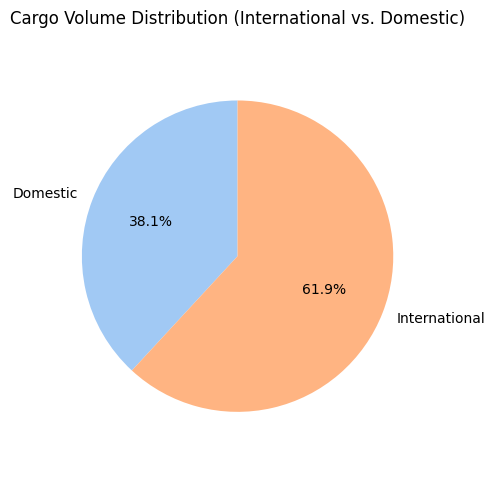

In [9]:
# Group by 'GEO Summary' and sum 'Cargo Metric TONS'
total_cargo_by_geo_summary = df_merged.groupby('GEO Summary')['Cargo Metric TONS'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    total_cargo_by_geo_summary['Cargo Metric TONS'],
    labels=total_cargo_by_geo_summary['GEO Summary'],
    autopct='%1.1f%%', # Display percentages on the chart
    startangle=90, # Start the first slice at the top
    colors=sns.color_palette('pastel')
)

plt.title('Cargo Volume Distribution (International vs. Domestic)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [10]:
# Extract Year and Month
df_merged['Year'] = df_merged['Activity Period Start Date'].dt.year
df_merged['Month'] = df_merged['Activity Period Start Date'].dt.month

# Aggregate the data by various dimensions
df_1 = df_merged.groupby(
    [
        'Year',
        'Month',
    ]
)['Cargo Metric TONS'].sum().reset_index()

# Display the first few rows of the aggregated data
print("Aggregated data by Year, Month, Airline, Region, Activity Type, and Cargo Type:")
display(df_1.head())

Aggregated data by Year, Month, Airline, Region, Activity Type, and Cargo Type:


,Year,Month,Cargo Metric TONS
0,2015,1,33514.08
1,2015,2,33812.30
2,2015,3,41292.11
3,2015,4,37454.61
4,2015,5,41600.79


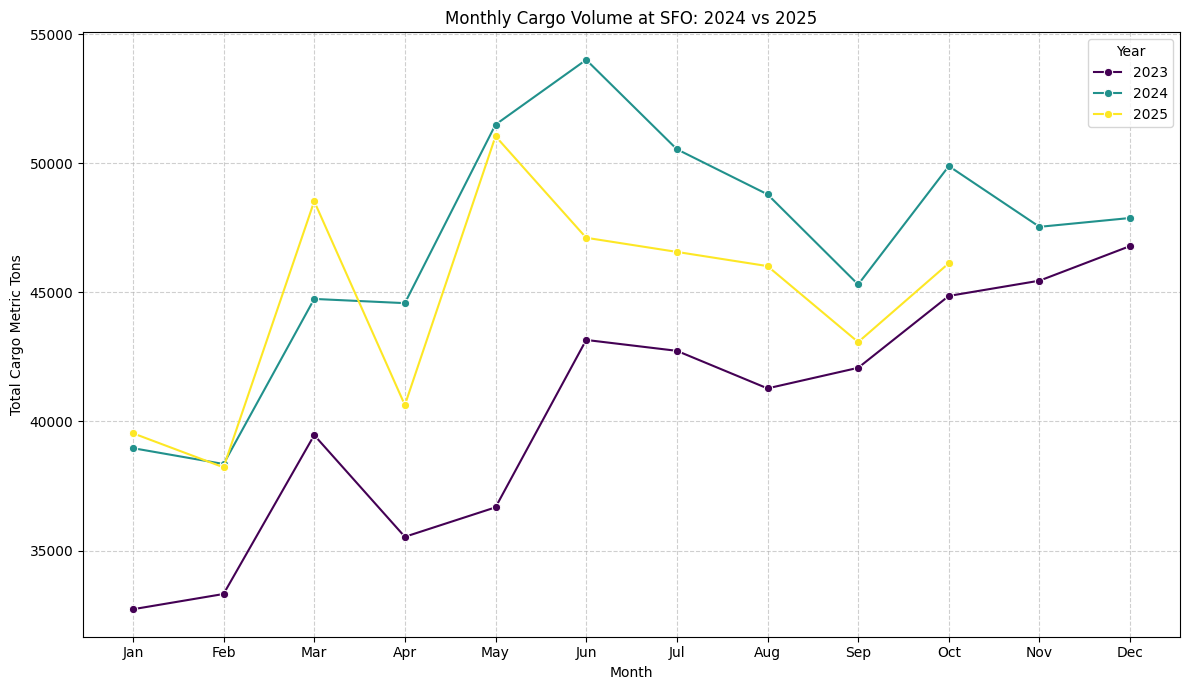

In [11]:
# Filter data for 2024 and 2025
df_2024_2025 = df_1[df_1['Year'].isin([2023,2024, 2025])].copy()

# Group by year and month and sum cargo volume (if not already done by df_1)
# If df_1 is already monthly aggregated, we can directly use df_2024_2025
# In this case, df_1 is already aggregated by Year and Month, so we just use the filtered df_2024_2025
monthly_cargo_volume = df_2024_2025

# Sort by month for proper plotting
monthly_cargo_volume = monthly_cargo_volume.sort_values(by=['Year', 'Month'])

# Plotting
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=monthly_cargo_volume,
    x='Month',
    y='Cargo Metric TONS',
    hue='Year',
    marker='o',
    palette='viridis'
)

plt.title('Monthly Cargo Volume at SFO: 2023 vs 2024 vs 2025')
plt.xlabel('Month')
plt.ylabel('Total Cargo Metric Tons')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

## 4.0 Results and Discussion

## 5.0 Conclusion

# Task
Perform an exploratory data analysis on the `df_merged` DataFrame to understand its structure, including data types, non-null counts, and descriptive statistics. Then, generate visualizations to analyze cargo volume trends: identify the top N 'Operating Airline IATA Code' by total cargo volume and plot their monthly trends; visualize monthly cargo volume trends for each 'Cargo Aircraft Type'; visualize monthly cargo volume trends broken down by 'GEO Summary' (International/Domestic); and visualize monthly cargo volume trends for each 'GEO Region'. Finally, summarize the key insights and observations from the EDA and all trend visualizations.

## EDA - Initial Data Overview

### Subtask:
Generate code to display basic information about the `df_merged` DataFrame, including data types, non-null counts, and descriptive statistics for numerical columns, along with unique values and counts for key categorical columns to understand the data's structure and content.


**Reasoning**:
The user wants to display basic information about the `df_merged` DataFrame, including data types, non-null counts, descriptive statistics for numerical columns, and unique values/counts for specified categorical columns. I will use `info()`, `describe()`, `nunique()`, and `value_counts()` methods in a single code block to fulfill this request.



**Reasoning**:
The next step is to identify the top N operating airlines by total cargo volume and then visualize their monthly cargo trends. This involves aggregating data by airline, year, and month, and then plotting the results.



## Visualize Total Cargo Volume by GEO Region (Bar Chart)

### Subtask:
Display the total cargo volume for each 'GEO Region' using a bar chart, allowing for a clear comparison of regional contributions to SFO's cargo operations.


**Reasoning**:
I need to group the `df_merged` DataFrame by 'GEO Region' and sum the 'Cargo Metric TONS' to get the total volume for each region. Then, I will use `seaborn.barplot` to visualize this aggregated data, ensuring appropriate labels, title, and rotated x-axis ticks are set for clarity.



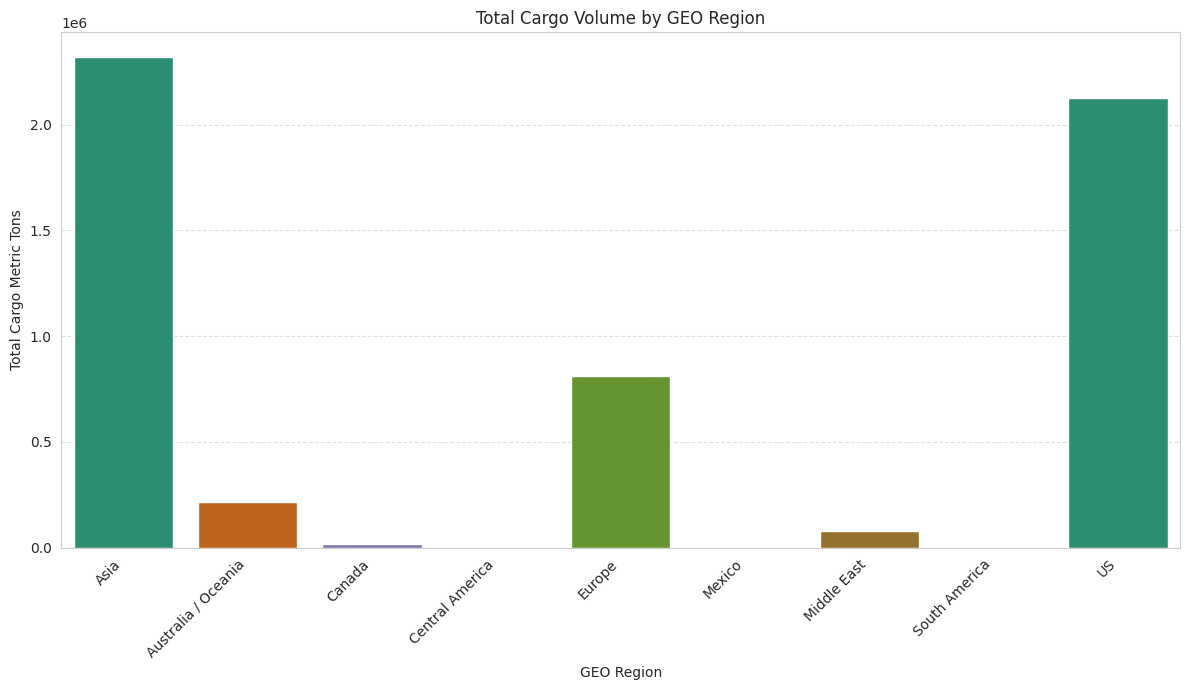

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Group by 'GEO Region' and sum 'Cargo Metric TONS'
total_cargo_by_geo_region = df_merged.groupby('GEO Region')['Cargo Metric TONS'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    data=total_cargo_by_geo_region,
    x='GEO Region',
    y='Cargo Metric TONS',
    hue='GEO Region', # Explicitly assign hue to match x and address FutureWarning
    palette='Dark2',
    legend=False # Set legend=False as hue is same as x
)

plt.title('Total Cargo Volume by GEO Region')
plt.xlabel('GEO Region')
plt.ylabel('Total Cargo Metric Tons')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Task
Aggregate the cargo data in `df_merged` by 'Operating Airline' and 'Cargo Aircraft Type' to calculate the total 'Cargo Metric TONS'. Identify the top 10 airlines based on their total cargo volume and filter the aggregated data to include only these airlines. Finally, generate a grouped bar chart showing the 'Cargo Metric TONS' for each of the top 10 airlines, broken down by 'Cargo Aircraft Type'.

## Aggregate cargo data by airline and aircraft type

### Subtask:
Calculate the total 'Cargo Metric TONS' for each 'Operating Airline' and 'Cargo Aircraft Type' from the `df_merged` DataFrame.


**Reasoning**:
To calculate the total 'Cargo Metric TONS' for each 'Operating Airline' and 'Cargo Aircraft Type', I will group the `df_merged` DataFrame by these two columns and then sum the 'Cargo Metric TONS'. The result will be stored in a new DataFrame, `df_cargo_by_airline_type`.



In [13]:
df_cargo_by_airline_type = df_merged.groupby(['Operating Airline', 'Cargo Aircraft Type'])['Cargo Metric TONS'].sum().reset_index()

print("Total Cargo Metric TONS by Operating Airline and Cargo Aircraft Type:")
display(df_cargo_by_airline_type.head())

Total Cargo Metric TONS by Operating Airline and Cargo Aircraft Type:


,Operating Airline,Cargo Aircraft Type,Cargo Metric TONS
0,"21 AIR, LLC",Freighter,33350.59
1,ABX AIR,Freighter,100274.48
2,"AER LINGUS, LTD.",Passenger,14667.65
3,AIR BERLIN,Passenger,818.08
4,AIR CANADA,Passenger,14706.48


**Reasoning**:
The next step is to identify the top 10 airlines based on their total cargo volume. This requires grouping `df_cargo_by_airline_type` by 'Operating Airline' and summing 'Cargo Metric TONS', then sorting to get the top 10.



In [14]:
top_10_airlines = df_cargo_by_airline_type.groupby('Operating Airline')['Cargo Metric TONS'].sum().nlargest(10).index

# Filter the original aggregated DataFrame to include only the top 10 airlines
df_top_10_airlines_cargo = df_cargo_by_airline_type[df_cargo_by_airline_type['Operating Airline'].isin(top_10_airlines)]

print("Top 10 Airlines by Total Cargo Volume (Metric Tons):")
display(df_top_10_airlines_cargo.head())

Top 10 Airlines by Total Cargo Volume (Metric Tons):


,Operating Airline,Cargo Aircraft Type,Cargo Metric TONS
14,"AIR TRANSPORT INTERNATIONAL, INC.",Freighter,251955.84
16,"ALL NIPPON COMPANY AIRWAYS, LTD.",Passenger,159437.33
19,ASIANA AIRLINES,Combi,380.00
20,ASIANA AIRLINES,Freighter,120819.85
21,ASIANA AIRLINES,Passenger,41424.97


**Reasoning**:
Now that the data for the top 10 airlines and their cargo volume by aircraft type is prepared, I will generate a grouped bar chart to visualize this breakdown, making it easy to compare cargo contributions by different aircraft types for each top airline.



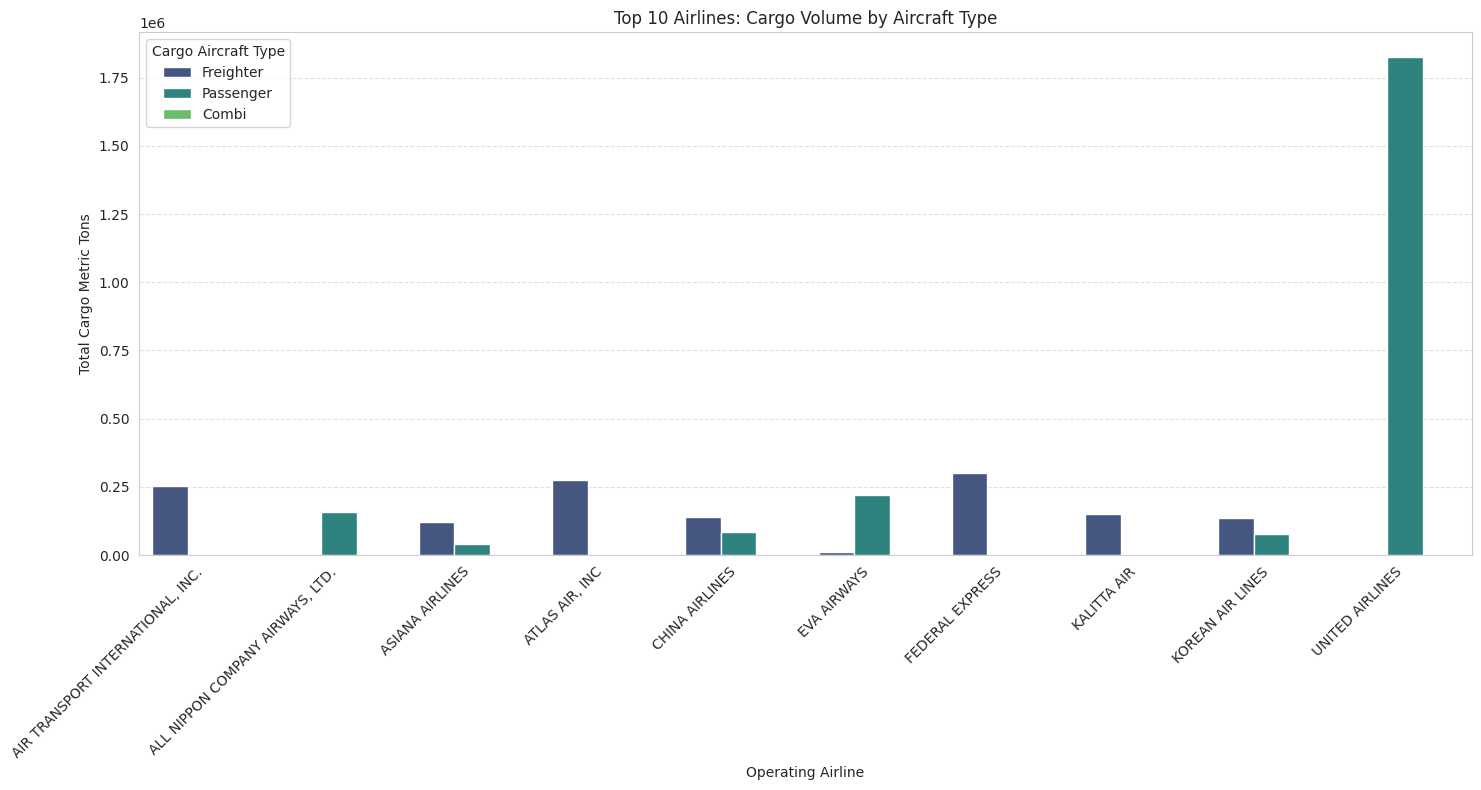

In [15]:
plt.figure(figsize=(15, 8))
sns.barplot(
    data=df_top_10_airlines_cargo,
    x='Operating Airline',
    y='Cargo Metric TONS',
    hue='Cargo Aircraft Type',
    palette='viridis'
)

plt.title('Top 10 Airlines: Cargo Volume by Aircraft Type')
plt.xlabel('Operating Airline')
plt.ylabel('Total Cargo Metric Tons')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cargo Aircraft Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous steps successfully aggregated cargo data by airline and aircraft type, identified the top 10 airlines, and visualized their cargo volume breakdown. Now, to address another part of the main task, I need to identify the top 10 'Operating Airline IATA Code' by total cargo volume and prepare the data for plotting their monthly trends. This involves grouping the `df_merged` data by 'Operating Airline IATA Code' and summing 'Cargo Metric TONS', then selecting the top 10, and finally filtering the original data for these top airlines.



In [16]:
import numpy as np

# Calculate total cargo volume per airline IATA code to identify top N
top_10_iata_codes = df_merged.groupby('Operating Airline IATA Code')['Cargo Metric TONS'].sum().nlargest(10).index.tolist()

# Filter df_merged to include only the top 10 IATA codes
df_top_10_iata_trends = df_merged[df_merged['Operating Airline IATA Code'].isin(top_10_iata_codes)].copy()

# Aggregate data by Year, Month, and Operating Airline IATA Code for trends
df_top_10_iata_monthly = df_top_10_iata_trends.groupby(
    ['Year', 'Month', 'Operating Airline IATA Code']
)['Cargo Metric TONS'].sum().reset_index()

print(f"Top 10 Operating Airline IATA Codes based on total cargo volume: {top_10_iata_codes}")
print("Monthly cargo volume trends for top 10 airlines (head):")
display(df_top_10_iata_monthly.head())

Top 10 Operating Airline IATA Codes based on total cargo volume: ['UA', 'FX', '5Y', '8C', 'BR', 'CI', 'KE', 'OZ', 'NH', 'K4']
Monthly cargo volume trends for top 10 airlines (head):


,Year,Month,Operating Airline IATA Code,Cargo Metric TONS
0,2015,1,BR,1498.58
1,2015,1,CI,1621.80
2,2015,1,FX,2846.19
3,2015,1,K4,46.88
4,2015,1,KE,1598.72


**Reasoning**:
To visualize the monthly cargo trends for the top 10 operating airlines, I will create a line plot using `seaborn.lineplot`. Each line will represent an airline (identified by its IATA code), showing its cargo volume over time (months and years).



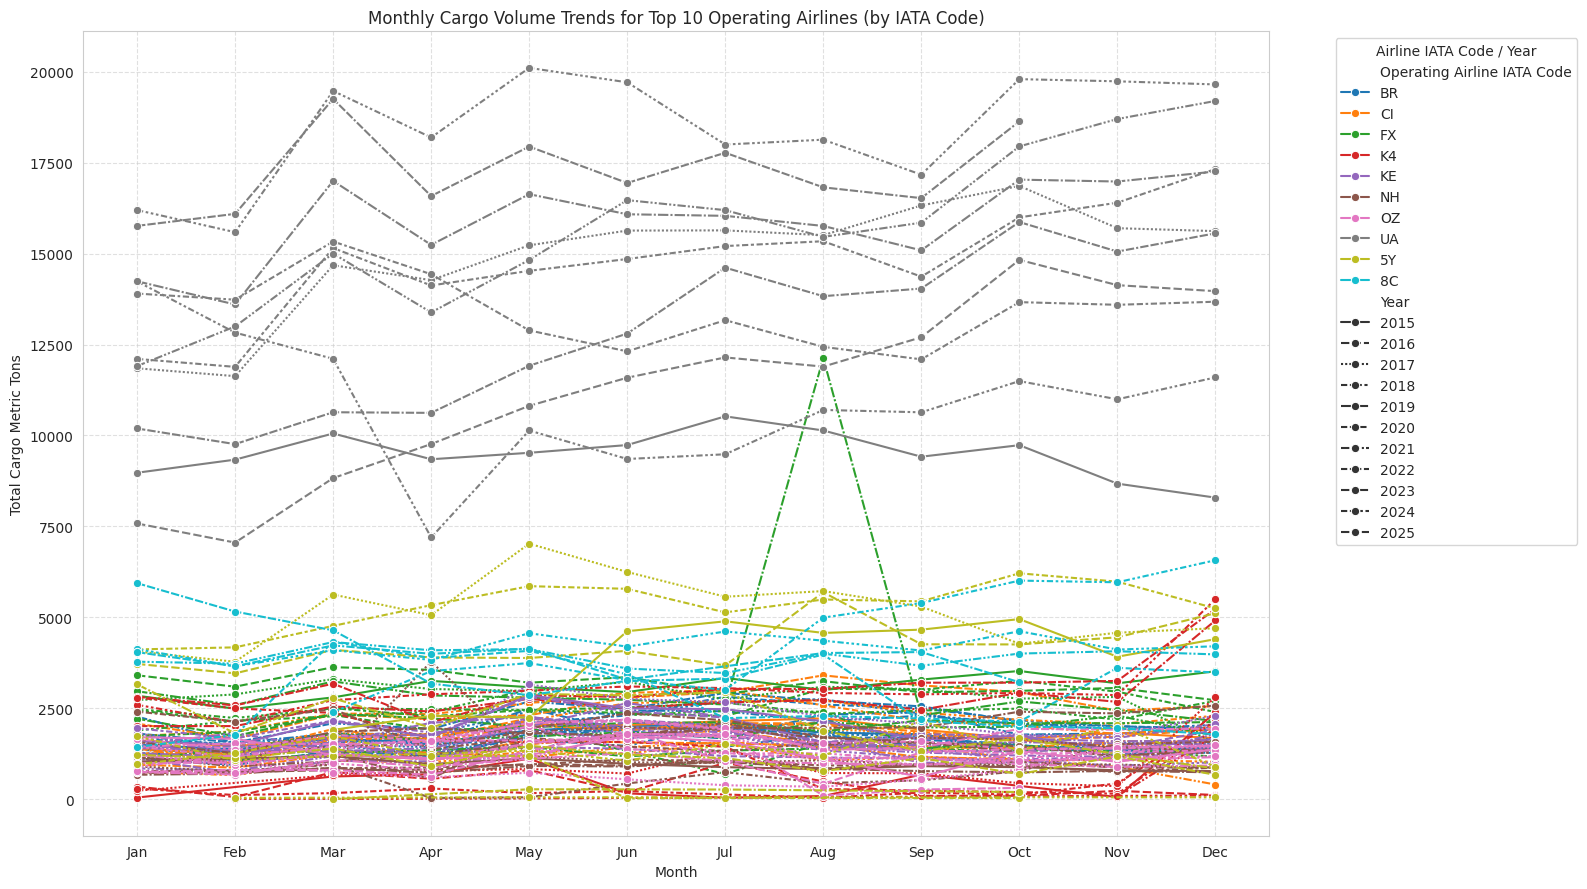

In [17]:
plt.figure(figsize=(16, 9))
sns.lineplot(
    data=df_top_10_iata_monthly,
    x='Month',
    y='Cargo Metric TONS',
    hue='Operating Airline IATA Code',
    style='Year',
    marker='o',
    palette='tab10'
)

plt.title('Monthly Cargo Volume Trends for Top 10 Operating Airlines (by IATA Code)')
plt.xlabel('Month')
plt.ylabel('Total Cargo Metric Tons')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Airline IATA Code / Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize the monthly cargo volume trends for each 'Cargo Aircraft Type', I need to group the `df_merged` DataFrame by 'Year', 'Month', and 'Cargo Aircraft Type' and sum the 'Cargo Metric TONS'. This aggregated data will then be used to create a line plot.



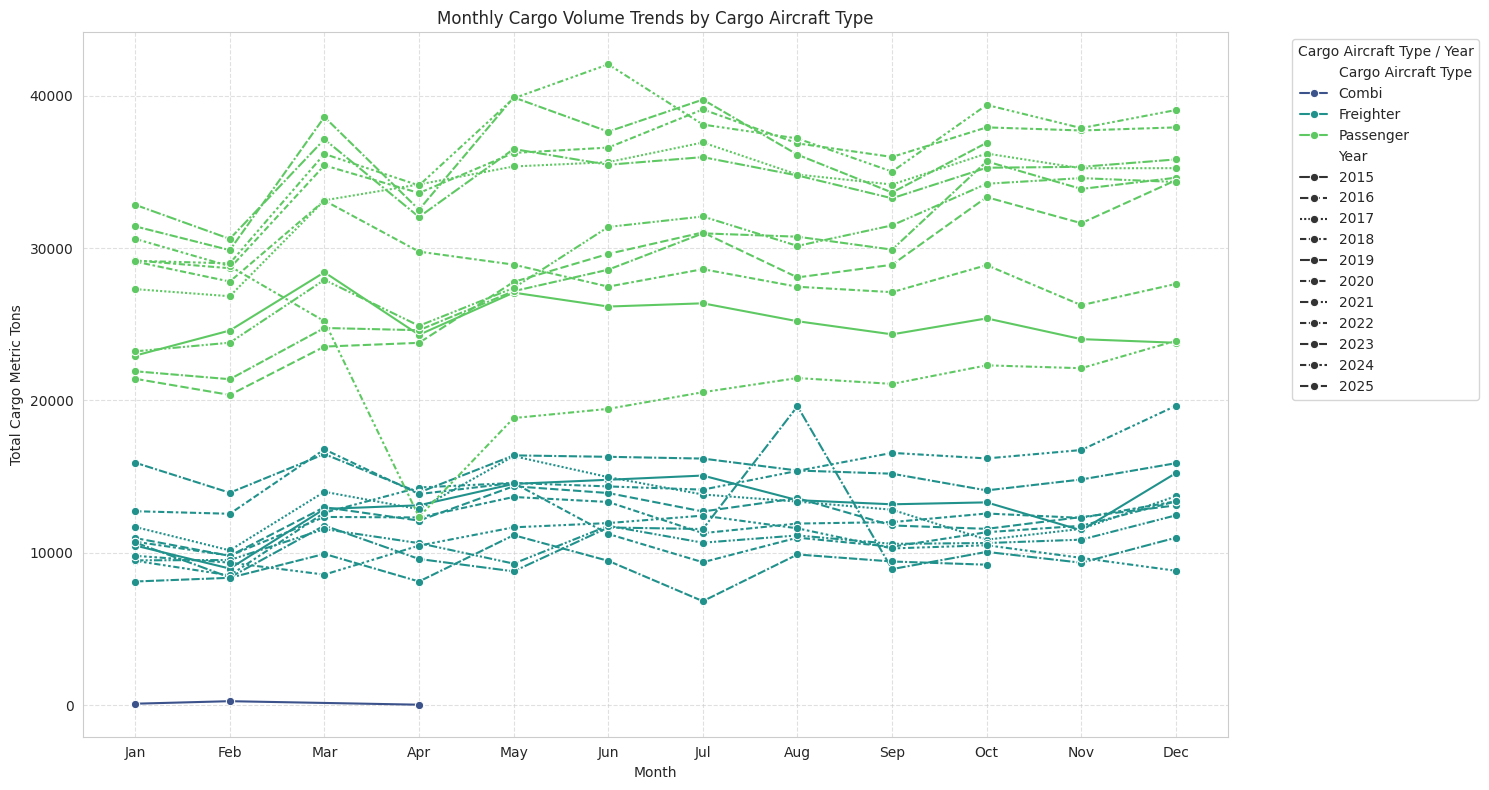

In [18]:
df_aircraft_type_monthly = df_merged.groupby(
    ['Year', 'Month', 'Cargo Aircraft Type']
)['Cargo Metric TONS'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(
    data=df_aircraft_type_monthly,
    x='Month',
    y='Cargo Metric TONS',
    hue='Cargo Aircraft Type',
    style='Year',
    marker='o',
    palette='viridis'
)

plt.title('Monthly Cargo Volume Trends by Cargo Aircraft Type')
plt.xlabel('Month')
plt.ylabel('Total Cargo Metric Tons')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Cargo Aircraft Type / Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize monthly cargo volume trends broken down by 'GEO Summary', I will group the `df_merged` DataFrame by 'Year', 'Month', and 'GEO Summary' and sum the 'Cargo Metric TONS'. Then, I will create a line plot to display these trends.



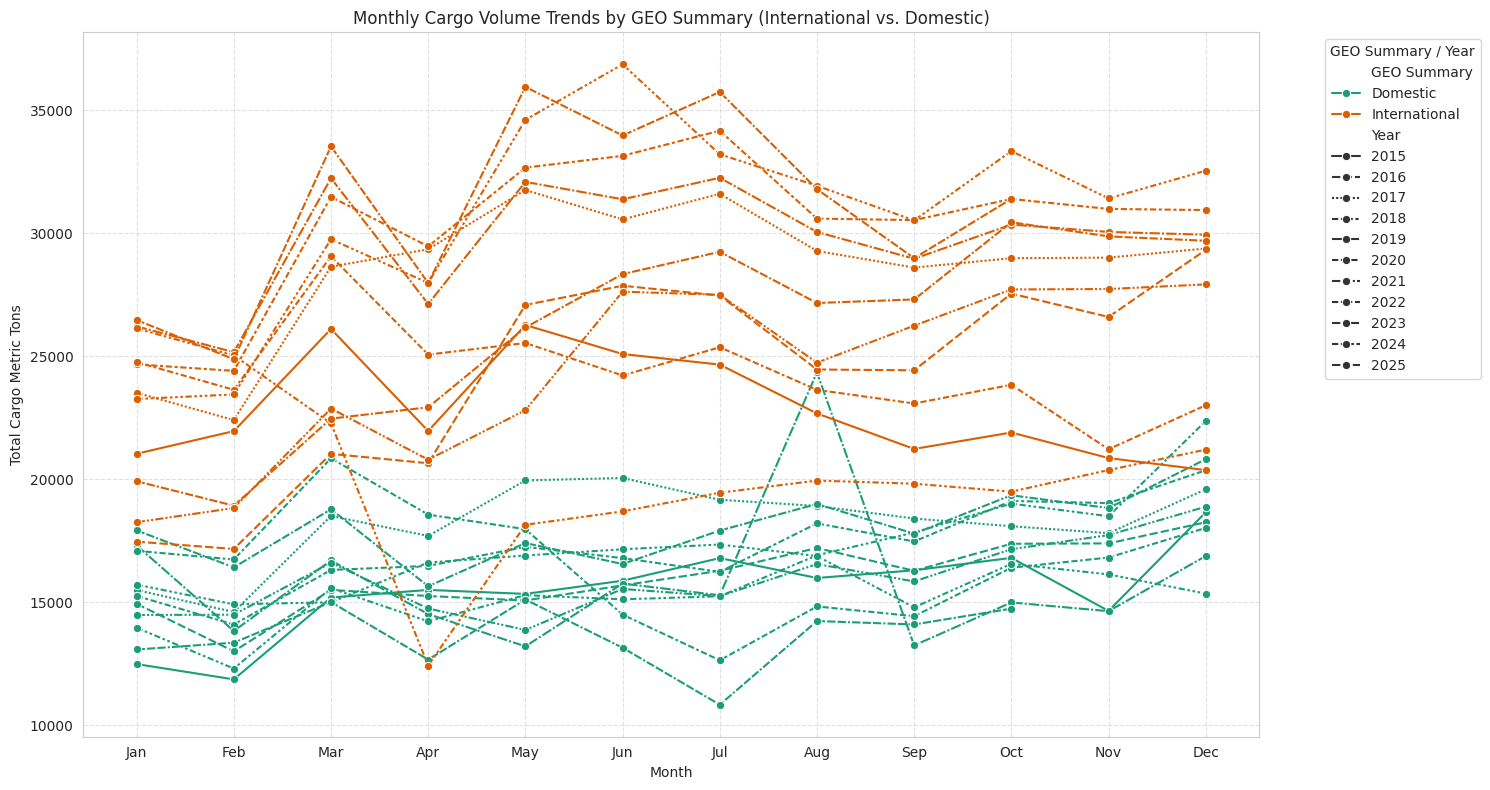

In [19]:
df_geo_summary_monthly = df_merged.groupby(
    ['Year', 'Month', 'GEO Summary']
)['Cargo Metric TONS'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(
    data=df_geo_summary_monthly,
    x='Month',
    y='Cargo Metric TONS',
    hue='GEO Summary',
    style='Year',
    marker='o',
    palette='Dark2'
)

plt.title('Monthly Cargo Volume Trends by GEO Summary (International vs. Domestic)')
plt.xlabel('Month')
plt.ylabel('Total Cargo Metric Tons')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='GEO Summary / Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize monthly cargo volume trends for each 'GEO Region', I will group the `df_merged` DataFrame by 'Year', 'Month', and 'GEO Region', and sum the 'Cargo Metric TONS'. Then, I will create a line plot to display these trends, ensuring the plot is clear and readable given the number of regions.



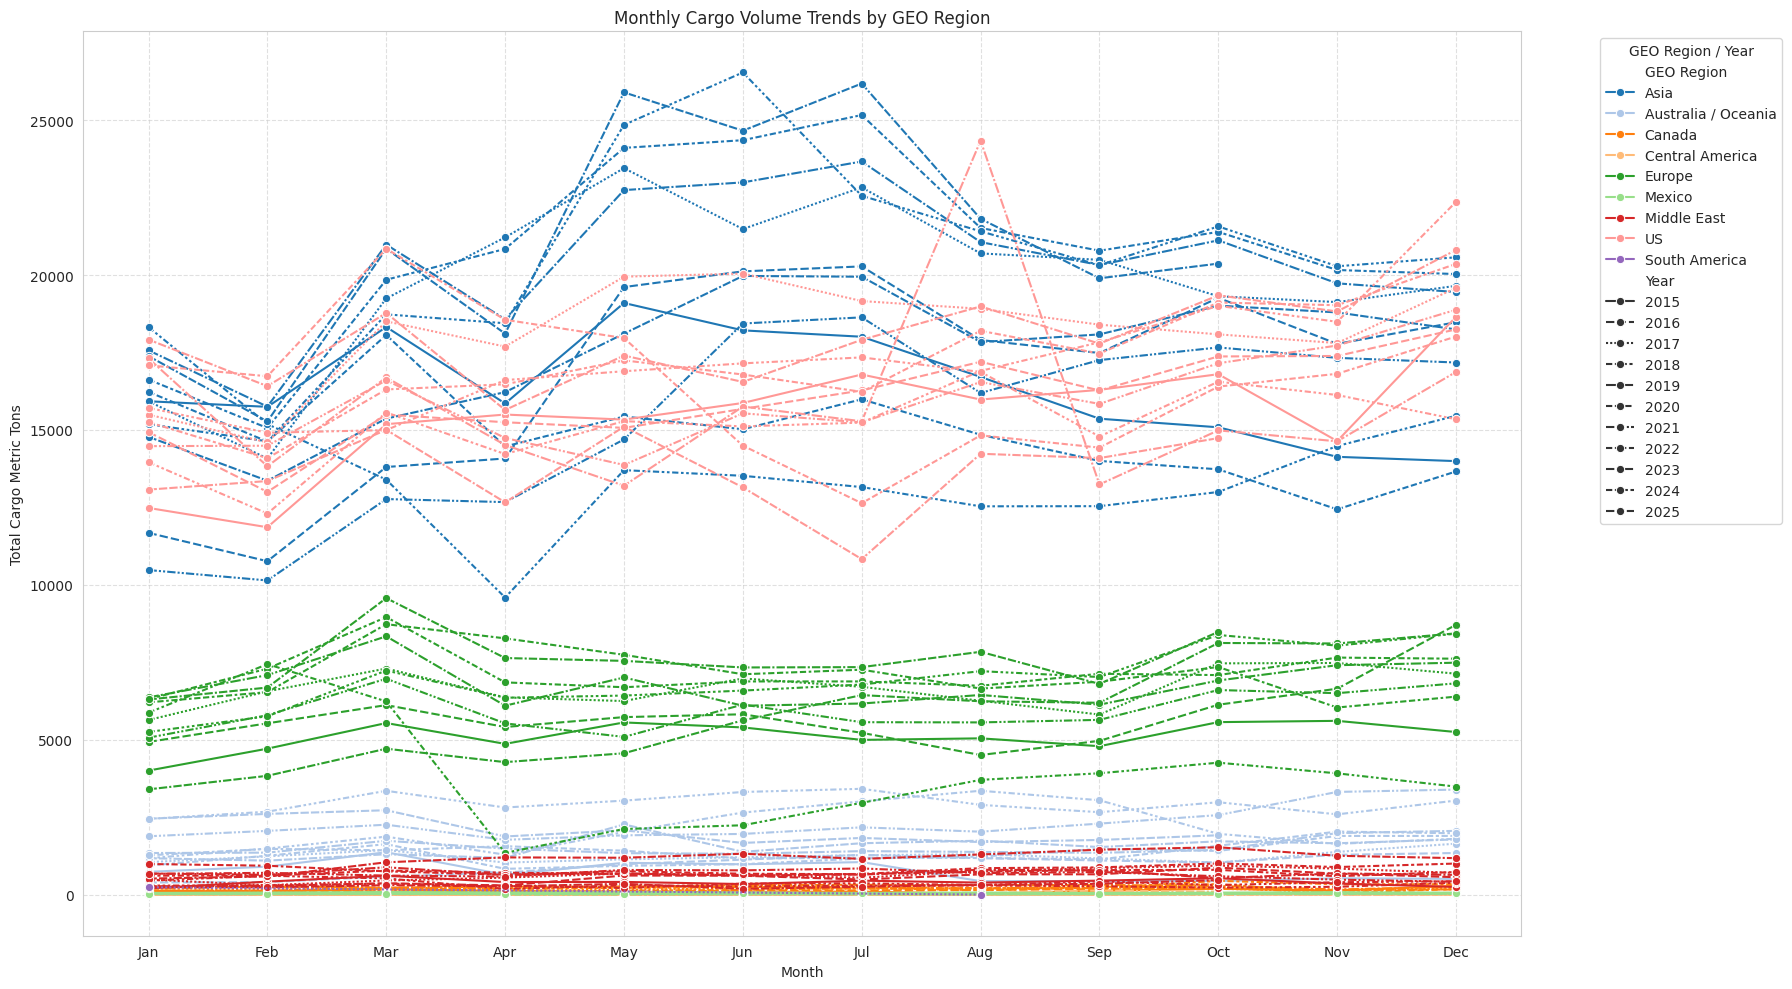

In [20]:
df_geo_region_monthly = df_merged.groupby(
    ['Year', 'Month', 'GEO Region']
)['Cargo Metric TONS'].sum().reset_index()

plt.figure(figsize=(18, 10)) # Adjust figure size for better readability with multiple regions
sns.lineplot(
    data=df_geo_region_monthly,
    x='Month',
    y='Cargo Metric TONS',
    hue='GEO Region',
    style='Year',
    marker='o',
    palette='tab20' # Use a palette with more distinct colors for multiple regions
)

plt.title('Monthly Cargo Volume Trends by GEO Region')
plt.xlabel('Month')
plt.ylabel('Total Cargo Metric Tons')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='GEO Region / Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Summarize key insights and observations

### Subtask:
Summarize the key insights and observations from the EDA and all generated trend visualizations.


### Summary of Key Insights and Observations

This analysis of San Francisco International Airport (SFO) cargo traffic from 2015 to 2025 (with projected data for 2025) reveals several critical insights into cargo movement, operational patterns, and regional contributions.

#### 1. Initial Data Overview:
*   The `df_merged` DataFrame contains 22,980 entries and 9 columns, with no missing values after cleaning, ensuring data integrity.
*   Numerical data, specifically `Cargo Metric TONS`, shows a wide range, indicating varying cargo volumes across different activities.
*   Key categorical columns (`Operating Airline`, `Operating Airline IATA Code`, `GEO Summary`, `GEO Region`, `Activity Type Code`, `Cargo Type Code`, `Cargo Aircraft Type`) are clean and well-distributed, with `United Airlines` being the most frequent operating airline and `International` cargo dominating `GEO Summary`.

#### 2. Cargo Volume Distribution (International vs. Domestic):
*   The pie chart clearly shows that **International cargo significantly outweighs Domestic cargo**, accounting for approximately 61.9% of the total cargo volume. This highlights SFO's crucial role as an international logistics hub.

#### 3. Monthly Cargo Volume at SFO: 2023 vs 2024 vs 2025:
*   The monthly trends show clear **seasonal patterns**, with cargo volumes generally peaking in the latter half of the year (e.g., Q3 and Q4, particularly around July-August and October-November), likely influenced by holiday seasons and increased global trade activities.
*   There is a noticeable **increase in cargo volume from 2023 to 2024**, suggesting a recovery or growth in SFO's cargo operations. The projected 2025 data continues this upward trend.
*   January and February often show lower cargo volumes, likely due to post-holiday slowdowns.

#### 4. Total Cargo Volume by GEO Region:
*   **Asia** is by far the dominant GEO Region for cargo traffic, followed by **US Domestic traffic** and **Europe**. This reinforces SFO's strategic importance in trans-Pacific trade routes.
*   Other regions like Australia/Oceania, Middle East, Canada, Mexico, Central America, and South America contribute smaller, but still significant, volumes.

#### 5. Top 10 Airlines: Cargo Volume by Aircraft Type:
*   **UNITED AIRLINES** leads in total cargo volume, primarily utilizing **Passenger** aircraft for cargo transport, indicating belly cargo operations.
*   Dedicated freighter operators like **AIR TRANSPORT INTERNATIONAL, INC. (8C)**, **FEDEX (FX)**, and **ATLAS AIR (5Y)** play a significant role, emphasizing the importance of specialized cargo aircraft.
*   Airlines like **ASIANA AIRLINES (OZ)** and **EVA AIRWAYS (BR)** use a mix of passenger and freighter aircraft, with some even using Combi aircraft (though Combi is negligible overall), demonstrating diversified cargo strategies.
*   The prominence of passenger aircraft in cargo transport for many top airlines suggests that a substantial portion of cargo moves in the belly holds of commercial passenger flights.

#### 6. Monthly Cargo Volume Trends for Top 10 Operating Airlines (by IATA Code):
*   Individual airlines exhibit distinct monthly patterns, though many align with the overall seasonal peaks and troughs. For example, **UA (United Airlines)**, **FX (FedEx)**, and **5Y (Atlas Air)** consistently handle high volumes.
*   Some airlines show more volatile month-to-month fluctuations than others, possibly due to their specific operational models (e.g., scheduled freighters vs. ad-hoc charters).
*   The line plot effectively visualizes individual airline contributions and their consistency or variability over time, highlighting key players in the SFO cargo ecosystem.

#### 7. Monthly Cargo Volume Trends by Cargo Aircraft Type:
*   **Passenger** aircraft consistently carry the largest volume of cargo throughout the year, reinforcing the observation about belly cargo importance.
*   **Freighter** aircraft show stable and substantial contributions, often complementing passenger aircraft cargo capacity, especially during peak seasons.
*   **Combi** aircraft's contribution is almost negligible, indicating a phase-out or minimal use of this aircraft type for cargo at SFO.
*   Both passenger and freighter cargo volumes generally follow similar seasonal trends, peaking together.

#### 8. Monthly Cargo Volume Trends by GEO Summary (International vs. Domestic):
*   Both **International** and **Domestic** cargo volumes exhibit similar seasonal patterns, peaking towards the end of the year and dipping at the beginning.
*   International cargo consistently maintains a higher volume than domestic cargo across all months and years, reaffirming SFO's role as a global gateway.
*   The growth observed from 2023 to 2025 is evident in both segments, with international cargo showing a slightly more pronounced increase in absolute terms.

#### 9. Monthly Cargo Volume Trends by GEO Region:
*   **Asia** consistently leads in cargo volume, showing strong seasonal peaks, especially in the latter half of the year.
*   **US Domestic** cargo also shows clear seasonality, mirroring the overall airport trends.
*   **Europe** maintains a significant but lower volume compared to Asia, with similar seasonal variations.
*   Regions like **Australia/Oceania**, **Middle East**, and **Canada** show smaller, yet noticeable, monthly fluctuations, often aligning with major trade events or passenger flight schedules.
*   Central and South America volumes are comparatively very low but show some consistency.

#### Overall Insights:
SFO's cargo operations are heavily influenced by international trade, particularly with Asia, and exhibit strong seasonality, with peak volumes towards the end of the year. Passenger aircraft belly holds contribute significantly to cargo capacity, though dedicated freighters are crucial for specific operations. The airport has seen a positive growth trajectory in cargo volumes from 2023 onwards, indicating a robust recovery and expansion of its logistics capabilities.

## Summary:

### Data Analysis Key Findings

*   International cargo constitutes approximately 61.9% of the total cargo volume at SFO, underscoring its role as a key international logistics hub.
*   Monthly cargo volumes exhibit clear seasonal patterns, generally peaking in Q3 and Q4 (July-August and October-November), with a noticeable upward trend observed from 2023 to 2025.
*   Asia is the predominant GEO Region for cargo traffic, followed by US Domestic traffic and Europe, reinforcing SFO's strategic importance in trans-Pacific trade routes.
*   Among the top 10 airlines by cargo volume, UNITED AIRLINES leads, primarily utilizing Passenger aircraft for cargo transport. Dedicated freighter operators like AIR TRANSPORT INTERNATIONAL, INC. and FEDEX also contribute significantly.
*   Passenger aircraft consistently carry the largest volume of cargo throughout the year, with freighter aircraft providing stable and substantial contributions, while Combi aircraft's contribution is negligible.

### Insights or Next Steps

*   SFO's significant reliance on international cargo, particularly with Asia, suggests focusing on strengthening trade partnerships and infrastructure in these key regions to further capitalize on existing strengths.
*   The substantial contribution of passenger aircraft to cargo volume indicates the importance of optimizing belly cargo operations and coordinating cargo strategies with passenger flight schedules.
